In [1]:
#load the %autoreload extension using the %load_ext magic command
#Then, we set the %autoreload magic command to 2, which means that modules will be reloaded every time a cell is executed
%load_ext autoreload
%autoreload 2

### Method agnostic data preprocessing

In [22]:
# OUTPUT_FOLDER = '3utr/processed/'
# OUTPUT_FOLDER = 'preprocessed_for_ml/'
OUTPUT_FOLDER = '../../data/preprocessed_for_ml/GRCh37.p13 hg19/UCSC/'

# MIRNA_NAME = 'hsa-miR-106b-5p'
# MIRNA_NAME = 'hsa-let'-7c-5p'
# MIRNA_NAME = 'hsa-miR-16-5p'
# MIRNA_NAME = 'hsa-miR-215-5p'
# MIRNA_NAME = 'hsa-miR-103a-3p'
# MIRNA_NAME = 'hsa-miR-200a-3p'
MIRNA_NAME = 'hsa-miR-200b-3p'

DATASET_NAME = 'mirna_fcs'
FOLD_CHANGE_FILE_PATH = '../../data/fold_change/mirna_fcs.csv'
MIRNA_FC_EXPERIMENT_DATA_URL = "https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/miRNA/main/modules/evaluation/mirna_fcs.csv"
# EXPLAINABILITY_SCORES_DATASET = "data/explainability_scores_{}".format(MIRNA_NAME)
# EXPLAINABILITY_SCORES_DATASET = "data/3utr.explainability_scores_{}".format(MIRNA_NAME)
# EXPLAINABILITY_SCORES_DATASET = f"data/3utr.sequences.refseq_id.mirna_fc.explainability_scores_{MIRNA_NAME}.refseq_id"

# EXPLAINABILITY_SCORES_DATASET = f"data/scanned/3utr.sequences.refseq_id.mirna_fc.explainability_scores_{MIRNA_NAME}"
EXPLAINABILITY_SCORES_DATASET = f"../../data/scanned/GRCh37.p13 hg19/UCSC/3utr.sequences.refseq_id.mirna_fc.explainability_scores_{MIRNA_NAME}"

# EXPLAINABILITY_SCORES_DATASET  = f"debug/3utr.sequences.refseq_id.mirna_fc.explainability_scores_{MIRNA_NAME}.refseq_id"

# UTR_DF_MIRNA_FC_CHR_CONSERVATION_PATH = 'data/conservation/3utr.sequences.refseq_id.mirna_fc.chr.conservation'
UTR_DF_MIRNA_FC_CHR_CONSERVATION_PATH = '../../data/conservation/hg19/UCSC/3utr.sequences.refseq_id.mirna_fc.chr.conservation'

UTR_DF_MIRNA_FC_CHR_CONSERVATION_FLIPED_TO_POSITIVE_STRAND_PATH = '../../data/conservation/3utr.sequences.refseq_id.mirna_fc.chr.conservation.flipped_to_positive_strand'

# EXPLAINABILITY_COLUMN_NAMES = ['mirna','gene_symbol','signal']
EXPLAINABILITY_COLUMN_NAMES = ['mirna','RefSeq ID','signal']
# MERGE_ON = 'gene_symbol'
MERGE_ON = 'RefSeq ID'

RANDOM_STATE = 42

In [3]:
from funmirtar.models.constants import TARGETSCAN_COLUMN_TO_SEQUENCE



In [6]:
from funmirtar.models.constants import TARGETSCAN_COLUMN_TO_SEQUENCE

MIRNA_SEQ = TARGETSCAN_COLUMN_TO_SEQUENCE[MIRNA_NAME]

MIRNA_SEQ

'TAATACTGCCTGGTAATGATGA'

In [20]:
from funmirtar.utils.data_collection import download_data_from_github_if_not_existing

download_data_from_github_if_not_existing(
    url = MIRNA_FC_EXPERIMENT_DATA_URL,
    output_file_path = FOLD_CHANGE_FILE_PATH,
)

'../../data/fold_change/mirna_fcs.csv'

In [26]:
from funmirtar.utils.data_collection import split_train_and_test_set


split_train_and_test_set(
    input_dataset_file_path = FOLD_CHANGE_FILE_PATH,
    column_to_split = MIRNA_NAME,
    columns_to_keep = ['gene_symbol', MIRNA_NAME],
    test_fraction = 0.25, 
    random_state = RANDOM_STATE,
    splits_distributions_similarity_pvalue_threshold = 0.05,
    output_file_path_train = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.train.csv',
    output_file_path_test = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.test.csv',
)

('../../data/preprocessed_for_ml/GRCh37.p13 hg19/UCSC/mirna_fcs.hsa-miR-200b-3p.train.csv',
 '../../data/preprocessed_for_ml/GRCh37.p13 hg19/UCSC/mirna_fcs.hsa-miR-200b-3p.test.csv')

In [27]:
from funmirtar.utils.data_collection import possitive_fold_change_to_zero


possitive_fold_change_to_zero(
    input_dataset_file_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.train.csv',
    column_name = MIRNA_NAME,
    output_path_suffix = '.positive_fc_to_zero',
)
possitive_fold_change_to_zero(
    input_dataset_file_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.test.csv',
    column_name = MIRNA_NAME,
    output_path_suffix = '.positive_fc_to_zero',
)

'../../data/preprocessed_for_ml/GRCh37.p13 hg19/UCSC/mirna_fcs.hsa-miR-200b-3p.test.positive_fc_to_zero.csv'

### Data preprocessing specific for signal data (in the clean code, will be under a specific module)

In [29]:
# import pandas as pd

# from google_drive_download import download_file_from_google_drive

# TODO check if response OK
# TODO DOWNLOAD only if not exist
# download_file_from_google_drive(  
#     file_id = '1ayyD1w6SHzLS8638eoBzUX3OMq4cxSUx',
#     destination = '{}.json'.format(EXPLAINABILITY_SCORES_DATASET),
# )

In [33]:
from funmirtar.utils.data_collection import convert_signals_json_to_pickle

convert_signals_json_to_pickle(
    signals_json_file_path = f"{EXPLAINABILITY_SCORES_DATASET}.json",
    output_file_path = f"{EXPLAINABILITY_SCORES_DATASET}.pkl",
    mirna_name = MIRNA_NAME,
    mirna_seq = MIRNA_SEQ,
    column_names = EXPLAINABILITY_COLUMN_NAMES
)

'../../data/scanned/GRCh37.p13 hg19/UCSC/3utr.sequences.refseq_id.mirna_fc.explainability_scores_hsa-miR-200b-3p.pkl'

In [35]:
from funmirtar.utils.data_collection import merge_fold_change_dataset_with_signals

merge_fold_change_dataset_with_signals(
    signals_df_path = '{}.pkl'.format(EXPLAINABILITY_SCORES_DATASET),
    fold_change_df_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.train.positive_fc_to_zero.csv',
    merge_on = MERGE_ON,
    mirna_name = MIRNA_NAME,
    # output_path_suffix = '.signals',
    output_file_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.train.positive_fc_to_zero.signals.csv',
)
merge_fold_change_dataset_with_signals(
    signals_df_path = '{}.pkl'.format(EXPLAINABILITY_SCORES_DATASET),
    fold_change_df_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.test.positive_fc_to_zero.csv',
    merge_on = MERGE_ON,
    mirna_name = MIRNA_NAME,
    # output_path_suffix = '.signals',
    output_file_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.test.positive_fc_to_zero.signals.csv',
)

'../../data/preprocessed_for_ml/GRCh37.p13 hg19/UCSC/mirna_fcs.hsa-miR-200b-3p.test.positive_fc_to_zero.signals.csv'

In [38]:
from funmirtar.utils.data_collection import merge_conservation

merge_conservation(
    conservation_df_path = f'{UTR_DF_MIRNA_FC_CHR_CONSERVATION_PATH}.pkl',
    fold_change_df_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.train.positive_fc_to_zero.signals.csv',
    merge_on = MERGE_ON,
    mirna_name = MIRNA_NAME,
    output_path_suffix = '.conservation',
    # output_file_path = 'data/{}{}.{}.train.positive_fc_to_zero.signals.pkl'.format(
    #     OUTPUT_FOLDER, DATASET_NAME, MIRNA_NAME),
)
merge_conservation(
    conservation_df_path = f'{UTR_DF_MIRNA_FC_CHR_CONSERVATION_PATH}.pkl',
    fold_change_df_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.test.positive_fc_to_zero.signals.csv',
    merge_on = MERGE_ON,
    mirna_name = MIRNA_NAME,
    output_path_suffix = '.conservation',
#     output_file_path = 'data/{}{}.{}.test.positive_fc_to_zero.signals.pkl'.format(
#         OUTPUT_FOLDER, DATASET_NAME, MIRNA_NAME),
)

'../../data/preprocessed_for_ml/GRCh37.p13 hg19/UCSC/mirna_fcs.hsa-miR-200b-3p.test.positive_fc_to_zero.signals.conservation.csv'

In [47]:
from funmirtar.utils.data_collection import normalize_column_based_on_train_set_NO_LOG, normalize_conservation_based_on_train_set_NO_LOG

normalize_column_based_on_train_set_NO_LOG(
    input_file_path_train = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.train.positive_fc_to_zero.signals.conservation.csv',
    input_file_path_test = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.test.positive_fc_to_zero.signals.conservation.csv',
    column = 'signal',
    output_path_suffix = ".normalize",
)

('../../data/preprocessed_for_ml/GRCh37.p13 hg19/UCSC/mirna_fcs.hsa-miR-200b-3p.train.positive_fc_to_zero.signals.conservation.normalize.csv',
 '../../data/preprocessed_for_ml/GRCh37.p13 hg19/UCSC/mirna_fcs.hsa-miR-200b-3p.test.positive_fc_to_zero.signals.conservation.normalize.csv')

In [48]:
from funmirtar.utils.data_collection import pad_empty_signal_based_on_conservation_length

pad_empty_signal_based_on_conservation_length(
    input_file_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.train.positive_fc_to_zero.signals.conservation.normalize.csv',
    to_pad_column_name = "signal",
    pad_based_on_column_name = "conservation_phylo",
    output_path_suffix = '.pad_empty_signal',
)

pad_empty_signal_based_on_conservation_length(
    input_file_path = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.test.positive_fc_to_zero.signals.conservation.normalize.csv',
    to_pad_column_name = "signal",
    pad_based_on_column_name = "conservation_phylo",
    output_path_suffix = '.pad_empty_signal',
)

'../../data/preprocessed_for_ml/GRCh37.p13 hg19/UCSC/mirna_fcs.hsa-miR-200b-3p.test.positive_fc_to_zero.signals.conservation.normalize.pad_empty_signal.csv'

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

input_file_path_test = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.test.positive_fc_to_zero.signals.conservation.normalize.pad_empty_signal.csv'
input_file_path_train = f'{OUTPUT_FOLDER}{DATASET_NAME}.{MIRNA_NAME}.train.positive_fc_to_zero.signals.conservation.normalize.pad_empty_signal.csv'

# data/3utr/processed/mirna_fcs.hsa-let-7c-5p.test.positive_fc_to_zero.signals.conservation.normalize.pad_empty_signal.pkl

df_train = pd.read_pickle(input_file_path_train)
df_test = pd.read_pickle(input_file_path_test)

In [51]:
df_train['RefSeq ID'].isnull().sum().sum(), df_test['RefSeq ID'].isnull().sum().sum()

(0, 0)

In [52]:
df_train['RefSeq ID'].shape, df_test['RefSeq ID'].shape

((6122,), (2041,))

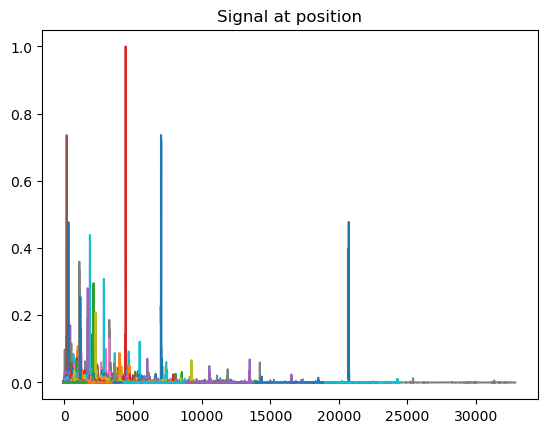

In [55]:
for i in range(df_train.shape[0]):
    plt.plot(df_train.head(i+1).signal.values[i])
for i in range(df_test.shape[0]):
    plt.plot(df_test.head(i+1).signal.values[i])
plt.title('Signal at position')
plt.savefig(OUTPUT_FOLDER + MIRNA_NAME + '.png', format="png", figsize=(12,6), dpi=100)

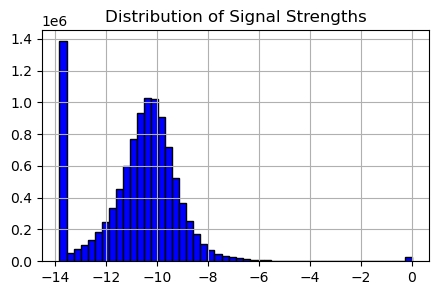

In [56]:
from math import log 

flattened_array = [log(item) if item > 0 else 0 for sublist in df_train.signal.values for item in sublist]
# flattened_array = [item for sublist in df_train.signal.values for item in sublist]

plt.figure(figsize=(5, 3))
plt.hist(flattened_array, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Signal Strengths')
plt.grid(True)
plt.show()

In [57]:
from sklearn.preprocessing import QuantileTransformer

transformer = QuantileTransformer(output_distribution='normal').fit(df_train.signal.explode().values.reshape(-1, 1))

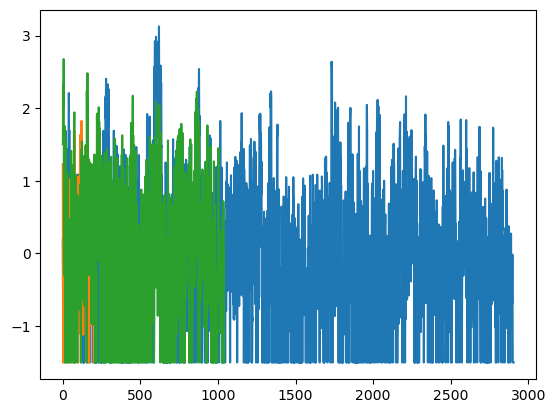

In [58]:
import numpy as np

# for i in range(df_train.shape[0]):
for i in range(3):
    signal = df_train.head(i+1).signal.values[i]
    if len(signal) > 0:
        plt.plot(transformer.transform(np.reshape(signal, (-1, 1))))
# for i in range(df_test.shape[0]):
#     signal = df_test.head(i+1).signal.values[i]
#     if len(signal) > 0:
#         plt.plot(transformer.transform(np.reshape(signal, (-1, 1))))


In [59]:
all_signals = [transformer.transform(np.reshape(signal, (-1, 1))) if len(signal) > 0 else [] for signal in df_train.signal.values]

In [60]:
flattened_array = [item[0] for sublist in all_signals for item in sublist]

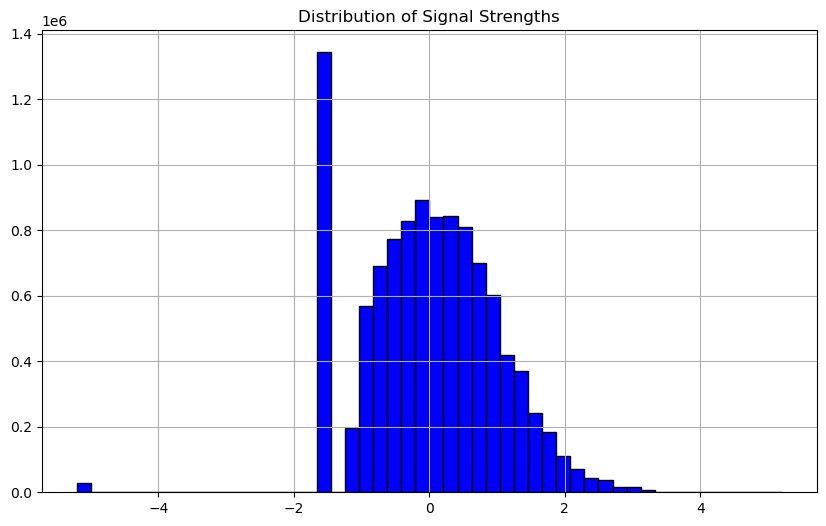

In [61]:
# Creating a histogram to visualize the distribution of signal strengths
plt.figure(figsize=(10, 6))
plt.hist(flattened_array, bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Signal Strengths')
# plt.xlabel('Signal Strength')
# plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [62]:
# for i in range(df_train.shape[0]):
#     plt.plot(df_train.head(i+1).conservation_phylo.values[i])
# # for i in range(df_test.shape[0]):
# #     plt.plot(df_test.head(i+1).signal.values[i])
# plt.title('Conservation at position')
# # plt.savefig('data/' + OUTPUT_FOLDER + MIRNA_NAME + '.png', format="png", figsize=(12,6), dpi=100)